<a href="https://colab.research.google.com/github/naidu-03/Dementia_detection/blob/main/Dementia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn as sk
print(sk.__version__)

1.2.2


In [3]:
# 1. data selection/ data reading
dataframe = pd.read_csv("/content/oasis_longitudinal.csv")

In [4]:
dataframe.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
dataframe.shape

(373, 15)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [7]:
dataframe.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [8]:
#check null values
dataframe.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [9]:
# 2. pre processing
#2.1 Data Cleaning using mean imputation
# checking missing values
meann = dataframe['MMSE'].mean()
dataframe['MMSE'].fillna(meann, inplace=True)
meann = dataframe['SES'].mean()
dataframe['SES'].fillna(meann, inplace=True)


In [10]:
dataframe.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

    Subject ID         MRI ID  Visit  MR Delay  Age  EDUC       SES  MMSE  \
0    OAS2_0001  OAS2_0001_MR1      1         0   87    14  2.000000  27.0   
1    OAS2_0001  OAS2_0001_MR2      2       457   88    14  2.000000  30.0   
2    OAS2_0002  OAS2_0002_MR1      1         0   75    12  2.460452  23.0   
3    OAS2_0002  OAS2_0002_MR2      2       560   76    12  2.460452  28.0   
4    OAS2_0002  OAS2_0002_MR3      3      1895   80    12  2.460452  22.0   
..         ...            ...    ...       ...  ...   ...       ...   ...   
368  OAS2_0185  OAS2_0185_MR2      2       842   82    16  1.000000  28.0   
369  OAS2_0185  OAS2_0185_MR3      3      2297   86    16  1.000000  26.0   
370  OAS2_0186  OAS2_0186_MR1      1         0   61    13  2.000000  30.0   
371  OAS2_0186  OAS2_0186_MR2      2       763   63    13  2.000000  30.0   
372  OAS2_0186  OAS2_0186_MR3      3      1608   65    13  2.000000  30.0   

     CDR  eTIV   nWBV    ASF  M/F_F  M/F_M  Hand_R  Group_Demented  \
0    

<ipython-input-11-4125b2270c2c>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataframe.corr()


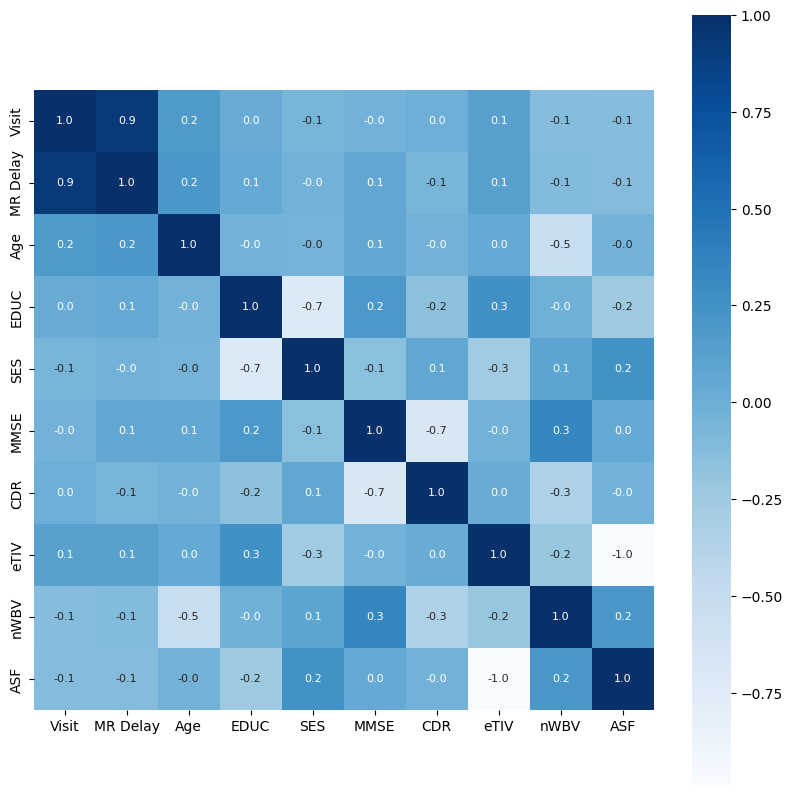

In [11]:
# visualization
dataframe['Group'] = dataframe['Group'].replace(['Converted'], ['Demented'])
# sns.countplot(x='Group', data=dataframe)
#2.2 Data Transformation using one hot encoding
categorical_columns = ['M/F', 'Hand','Group']
df_encoded = pd.get_dummies(dataframe, columns=categorical_columns)
print(df_encoded)
# sns.countplot(x='Group', data=dataframe)
correlation = dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
plt.show()


In [12]:

# 3. data splitting
from sklearn.model_selection import train_test_split
feature_col_names = ["EDUC", "ASF", "eTIV", "MMSE","nWBV","CDR","Age"]
predicted_class_names = ['Group_Demented']
print(dataframe)
print(df_encoded)
X = df_encoded[feature_col_names].values
y = df_encoded[predicted_class_names].values


    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.000000  2

In [13]:
#3.Feature Extraction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X = pca.fit_transform(X)

# spliting the x and y into test and train
test_size = 0.40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=2)
#print(X_train)
print(X_test)
y_train = y_train.reshape(int(dataframe.shape[0]*(1-test_size)))

[[-1.01393066e+01 -4.35000410e+00  1.14762839e+01  1.07644182e+00
  -8.20028553e-02]
 [-4.21611642e+01 -1.07994141e+01 -2.01341858e+00 -3.40322541e+00
   3.90816724e-01]
 [-1.28143219e+02 -3.66832120e+00 -2.22204703e+00 -1.92074433e+00
  -1.07584928e-01]
 [-2.71424201e+01 -5.92887384e+00 -6.39173484e-01 -8.19554888e-01
  -2.43043238e-01]
 [ 3.24873752e+02  8.43937502e+00  1.59405449e+00 -3.50709087e+00
  -3.31906097e-01]
 [ 2.00863361e+02  2.69598489e+00  3.98443998e-01 -3.45140482e+00
  -2.56485283e-01]
 [ 2.23863841e+02 -9.71283881e+00  7.38093854e+00  2.80077326e+00
   1.36769816e-01]
 [-5.01567595e+01 -8.82074618e+00 -1.04963536e+00 -3.01139468e+00
  -1.77274128e-01]
 [-1.17126023e+02 -5.76284213e+00 -3.85836661e+00  2.72217165e+00
  -9.19437214e-02]
 [ 1.79868536e+02  1.26115200e+01  6.69818729e+00 -5.30828297e+00
  -1.19517475e-01]
 [ 6.84250164e+00 -1.08995744e+01 -2.33206323e+00 -2.67223610e+00
  -1.05009938e-01]
 [ 9.88770130e+00  9.04904156e+00 -2.36601270e+00 -2.66374764e-01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=87b5af04bb939a196e999ef1dfdffdbd3f758f76d0e36b82ce82178c1f4d2149
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout
 The best solution found:
 [8. 5. 3. 4.]

 Objective function:
 -0.9733333333333334


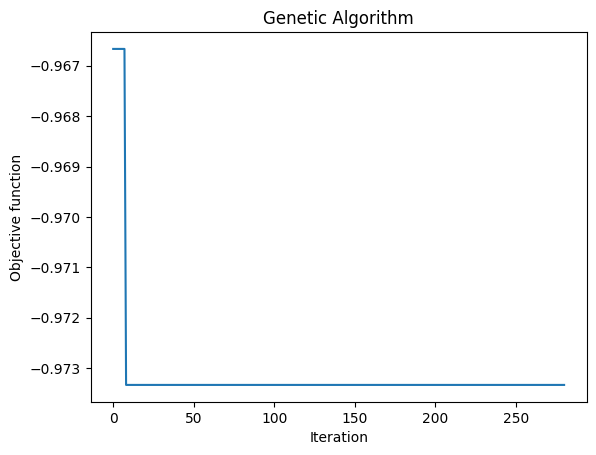

In [14]:
!pip install geneticalgorithm
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from geneticalgorithm import geneticalgorithm as ga
# 4. Genetic algorithm optimization
def fitness_function(X):
    clf = DecisionTreeClassifier(max_depth=int(X[0]),
                                 min_samples_split=int(X[1]),
                                 min_samples_leaf=int(X[2]),
                                 max_features=int(X[3]))
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    return -1*((cm[0][0]+cm[1][1])/len(y_test))

varbound = np.array([[1,30]]*1+[[2,20]]*1+[[1,20]]*1+[[1,5]]*1)
model = ga(function=fitness_function, dimension=4, variable_type='int', variable_boundaries=varbound)
model.run()

In [15]:
# 5. Model fitting
DT = DecisionTreeClassifier(max_depth=int(model.best_variable[0]),
                            min_samples_split=int(model.best_variable[1]),
                            min_samples_leaf=int(model.best_variable[2]),
                            max_features=int(model.best_variable[3]))

DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features=4, min_samples_leaf=3,
                       min_samples_split=5)

In [16]:
# 6. Prediction
ts_pred = DT.predict(X_test)
tr_pred=DT.predict(X_train)
print(X_test)
print(ts_pred)

[[-1.01393066e+01 -4.35000410e+00  1.14762839e+01  1.07644182e+00
  -8.20028553e-02]
 [-4.21611642e+01 -1.07994141e+01 -2.01341858e+00 -3.40322541e+00
   3.90816724e-01]
 [-1.28143219e+02 -3.66832120e+00 -2.22204703e+00 -1.92074433e+00
  -1.07584928e-01]
 [-2.71424201e+01 -5.92887384e+00 -6.39173484e-01 -8.19554888e-01
  -2.43043238e-01]
 [ 3.24873752e+02  8.43937502e+00  1.59405449e+00 -3.50709087e+00
  -3.31906097e-01]
 [ 2.00863361e+02  2.69598489e+00  3.98443998e-01 -3.45140482e+00
  -2.56485283e-01]
 [ 2.23863841e+02 -9.71283881e+00  7.38093854e+00  2.80077326e+00
   1.36769816e-01]
 [-5.01567595e+01 -8.82074618e+00 -1.04963536e+00 -3.01139468e+00
  -1.77274128e-01]
 [-1.17126023e+02 -5.76284213e+00 -3.85836661e+00  2.72217165e+00
  -9.19437214e-02]
 [ 1.79868536e+02  1.26115200e+01  6.69818729e+00 -5.30828297e+00
  -1.19517475e-01]
 [ 6.84250164e+00 -1.08995744e+01 -2.33206323e+00 -2.67223610e+00
  -1.05009938e-01]
 [ 9.88770130e+00  9.04904156e+00 -2.36601270e+00 -2.66374764e-01

In [17]:
# 7. Performance evaluation
def get_accuracy(info):
    cm1=confusion_matrix(y_test, info)
    TP = cm1[0][0] #true positive
    FP = cm1[0][1]
    FN = cm1[1][0]
    TN = cm1[1][1]
    Total=TP+TN+FP+FN
    accuracy=((TP+TN)/Total)*100
    precision=TP/(TP+FP)*100
    sensitivity=TP/(TP+FN)*100
    specificity = (TN / (TN+FP))*100
    F1_score = (2 * precision * sensitivity) / (precision + sensitivity)

    print("---------------------------------------")
    print("Accuracy: ",accuracy,'%')
    print("Precision: ",precision,'%')
    print("Sensitivity: ",sensitivity,'%')
    print("Specificity: ",specificity,'%')
    print("F1_score: ",F1_score,'%')

    return [accuracy, precision, sensitivity, specificity, F1_score]
info =ts_pred
get_accuracy(info)

---------------------------------------
Accuracy:  94.0 %
Precision:  93.67088607594937 %
Sensitivity:  94.87179487179486 %
Specificity:  93.05555555555556 %
F1_score:  94.26751592356688 %


[94.0,
 93.67088607594937,
 94.87179487179486,
 93.05555555555556,
 94.26751592356688]

In [18]:
import pickle
with open('dementiadetection.pickle','wb') as f:
  pickle.dump(DT,f)

In [22]:
#"EDUC", "ASF", "eTIV", "MMSE","nWBV","CDR"
input_data = [[12, 1.2, 1300, 28, 0.2, 0.5,69]]
input_data = pca.transform(input_data)
pred = DT.predict(input_data)
if pred==[1]:
  print("Demented")
else:
  print("Non-Demented")

Demented
